# I. 기본 RESNET 모델

In [ ]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

In [5]:
tf.config.set_visible_devices([], 'GPU')

Epoch 1/30


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


413/413 [==============================] - 3s 5ms/step - loss: 0.4483 - accuracy: 0.8547 - val_loss: 0.3480 - val_accuracy: 0.8776
Epoch 2/30
413/413 [==============================] - 2s 4ms/step - loss: 0.2546 - accuracy: 0.9158 - val_loss: 0.2504 - val_accuracy: 0.9158
Epoch 3/30
413/413 [==============================] - 2s 4ms/step - loss: 0.2103 - accuracy: 0.9294 - val_loss: 0.2823 - val_accuracy: 0.9003
Epoch 4/30
413/413 [==============================] - 2s 4ms/step - loss: 0.1881 - accuracy: 0.9359 - val_loss: 0.1903 - val_accuracy: 0.9361
Epoch 5/30
413/413 [==============================] - 2s 4ms/step - loss: 0.1719 - accuracy: 0.9415 - val_loss: 0.2826 - val_accuracy: 0.9064
Epoch 6/30
413/413 [==============================] - 2s 4ms/step - loss: 0.1541 - accuracy: 0.9470 - val_loss: 0.1816 - val_accuracy: 0.9373
Epoch 7/30
413/413 [==============================] - 2s 4ms/step - loss: 0.1422 - accuracy: 0.9520 - val_loss: 0.1755 - val_accuracy: 0.9382
Epoch 8/30
413/41

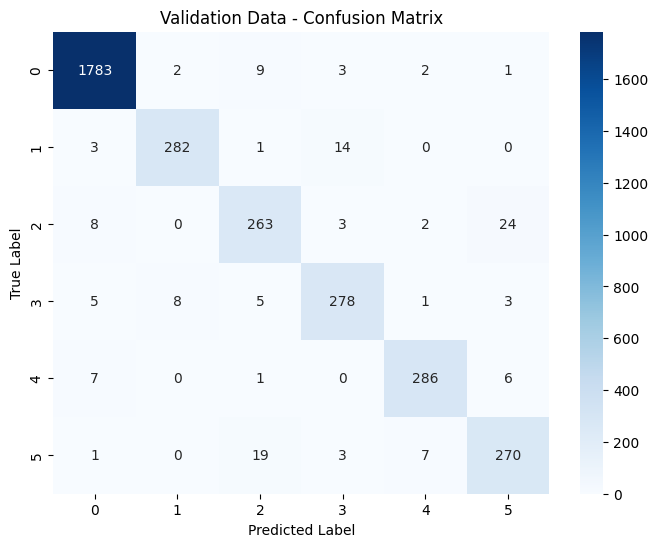


📊 Validation 데이터 평가 결과:
🔹 정확도 (Accuracy): 0.9582
🔹 정밀도 (Precision): 0.9582
🔹 재현율 (Recall): 0.9582
🔹 F1-Score: 0.9582

📜 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1800
           1       0.97      0.94      0.95       300
           2       0.88      0.88      0.88       300
           3       0.92      0.93      0.93       300
           4       0.96      0.95      0.96       300
           5       0.89      0.90      0.89       300

    accuracy                           0.96      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.96      0.96      0.96      3300

31/31 [==============================] - 0s 2ms/step


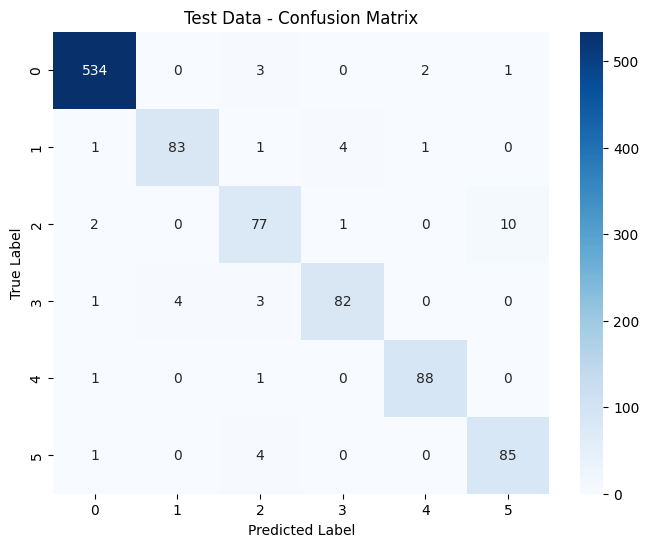


📊 Test 데이터 평가 결과:
🔹 정확도 (Accuracy): 0.9586
🔹 정밀도 (Precision): 0.9589
🔹 재현율 (Recall): 0.9586
🔹 F1-Score: 0.9586

📜 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       540
           1       0.95      0.92      0.94        90
           2       0.87      0.86      0.86        90
           3       0.94      0.91      0.93        90
           4       0.97      0.98      0.97        90
           5       0.89      0.94      0.91        90

    accuracy                           0.96       990
   macro avg       0.93      0.93      0.93       990
weighted avg       0.96      0.96      0.96       990



In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 데이터 불러오기
train_file = "final_training_data_sampled_1500_category_03.csv"
test_file = "final_test_sampled_90_category_03.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# 2️⃣ 데이터 전처리
# 'mfcc_1' ~ 'mfcc_50'까지 모든 MFCC 특성을 가져옴
mfcc_features = [col for col in df_train.columns if col.startswith('mfcc_')]
X = df_train[mfcc_features].values
y = df_train['ood_label'].values.reshape(-1, 1)

# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# Train / Validation Split (8:2)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ ResNet 모델 정의
def build_resnet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0], 1))(inputs)
    
    # ResNet Block 1
    x = layers.Conv1D(32, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # ResNet Block 2
    x = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # ResNet Block 3
    x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    
    # Fully Connected Layer
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs, outputs)
    return model

# 모델 생성
input_shape = (X_train.shape[1],)
num_classes = y_encoded.shape[1]
model = build_resnet(input_shape, num_classes)

# 모델 컴파일
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 4️⃣ 모델 학습
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# 5️⃣ 평가 함수 정의 및 적용
def evaluate_and_plot(model, X, y_true, dataset_name="Validation"):
    """ 모델 평가 및 시각화 """
    y_pred_probs = model.predict(X)  # 예측 확률값
    y_pred = np.argmax(y_pred_probs, axis=1)  # 가장 높은 확률을 가진 클래스 선택
    
    # 🔹 y_true가 원-핫 인코딩 되어 있다면, 정수형 레이블로 변환
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    # 📌 1️⃣ 혼동 행렬 계산
    cm = confusion_matrix(y_true, y_pred)
    
    # 📌 2️⃣ 평가 지표 계산
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # 📌 3️⃣ 혼동 행렬 시각화
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Data - Confusion Matrix")
    plt.show()

    # 📌 4️⃣ 평가 지표 출력
    print(f"\n📊 {dataset_name} 데이터 평가 결과:")
    print(f"🔹 정확도 (Accuracy): {acc:.4f}")
    print(f"🔹 정밀도 (Precision): {precision:.4f}")
    print(f"🔹 재현율 (Recall): {recall:.4f}")
    print(f"🔹 F1-Score: {f1:.4f}")
    print("\n📜 Classification Report:\n", classification_report(y_true, y_pred))

# 🔹 검증 데이터 평가
evaluate_and_plot(model, X_val, y_val, "Validation")

# 🔹 테스트 데이터 평가
X_test = df_test[mfcc_features].values
y_test = df_test['ood_label'].values.reshape(-1, 1)
y_test_encoded = encoder.transform(y_test)
evaluate_and_plot(model, X_test, y_test_encoded, "Test")

# II. 성능개선

## 1. 1차 성능 개선

Train unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Test unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
X_train shape: (16500, 50, 1)
X_test shape: (990, 50, 1)
Augmented X_train shape: (22500, 50, 1)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 50, 1)]              0         []                            
                                                                                                  
 conv1d_15 (Conv1D)          (None, 25, 64)               512       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_12 (Ba  (None, 25, 64)               256       ['conv1d_15[0][0]']           
 tchNormalization)                                    

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - 1s 7ms/step


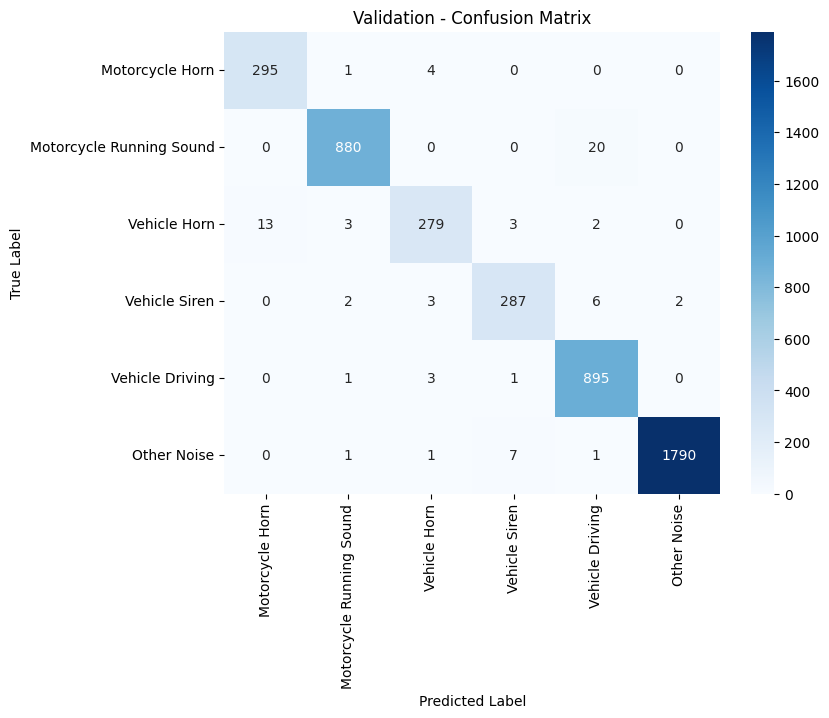

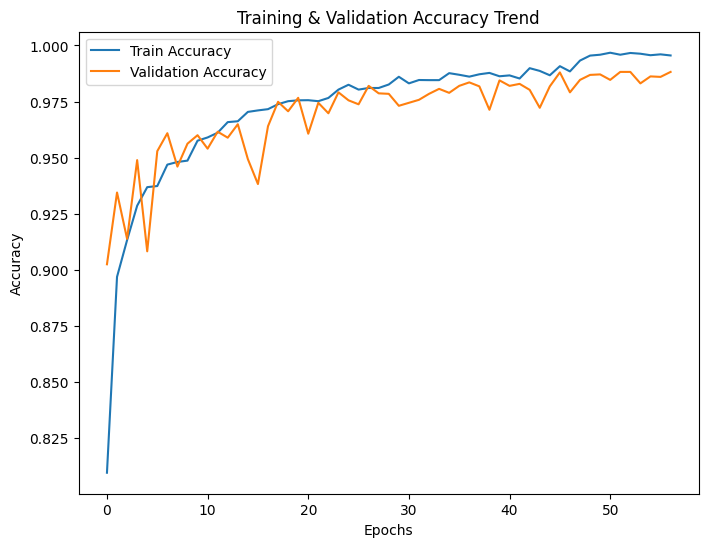


Validation Evaluation:
 Accuracy: 0.9836

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.96      0.98      0.97       300
Motorcycle Running Sound       0.99      0.98      0.98       900
            Vehicle Horn       0.96      0.93      0.95       300
           Vehicle Siren       0.96      0.96      0.96       300
         Vehicle Driving       0.97      0.99      0.98       900
             Other Noise       1.00      0.99      1.00      1800

                accuracy                           0.98      4500
               macro avg       0.97      0.97      0.97      4500
            weighted avg       0.98      0.98      0.98      4500

31/31 [==============================] - 0s 7ms/step


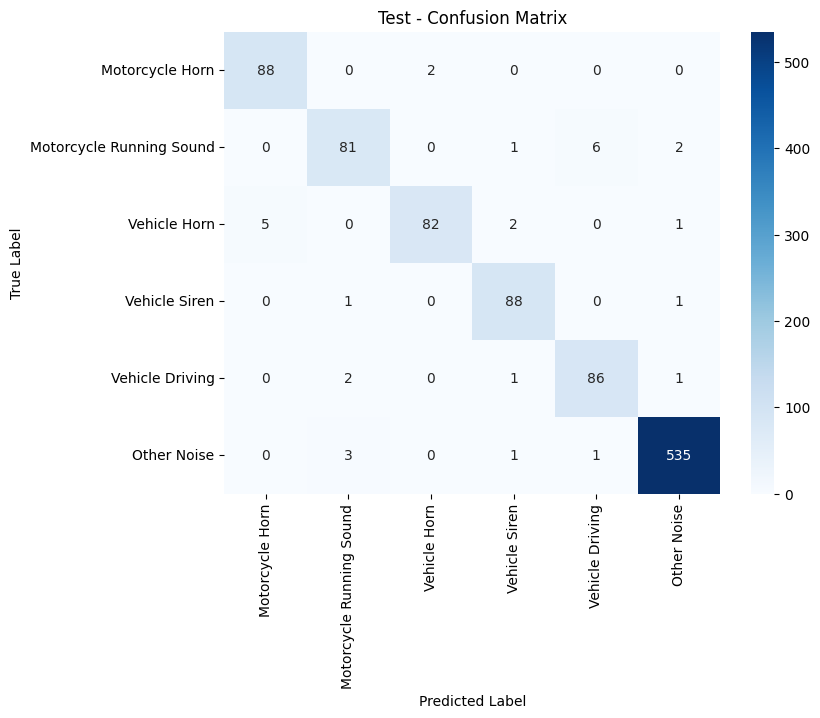

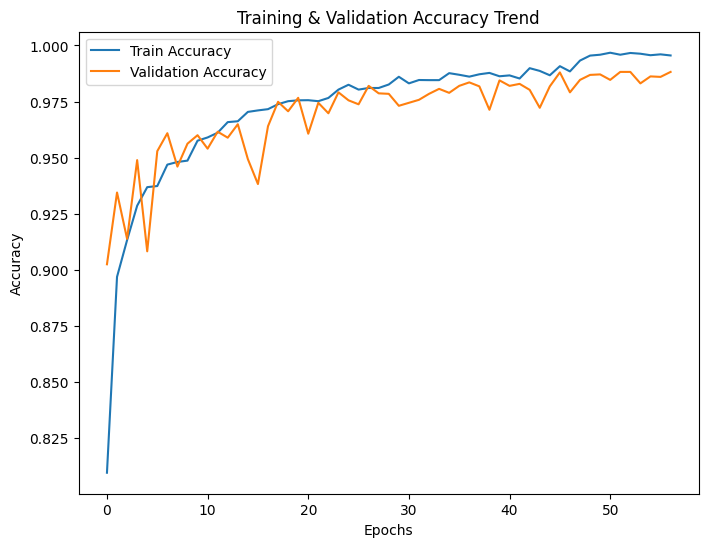


Test Evaluation:
 Accuracy: 0.9697

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.95      0.98      0.96        90
Motorcycle Running Sound       0.93      0.90      0.92        90
            Vehicle Horn       0.98      0.91      0.94        90
           Vehicle Siren       0.95      0.98      0.96        90
         Vehicle Driving       0.92      0.96      0.94        90
             Other Noise       0.99      0.99      0.99       540

                accuracy                           0.97       990
               macro avg       0.95      0.95      0.95       990
            weighted avg       0.97      0.97      0.97       990



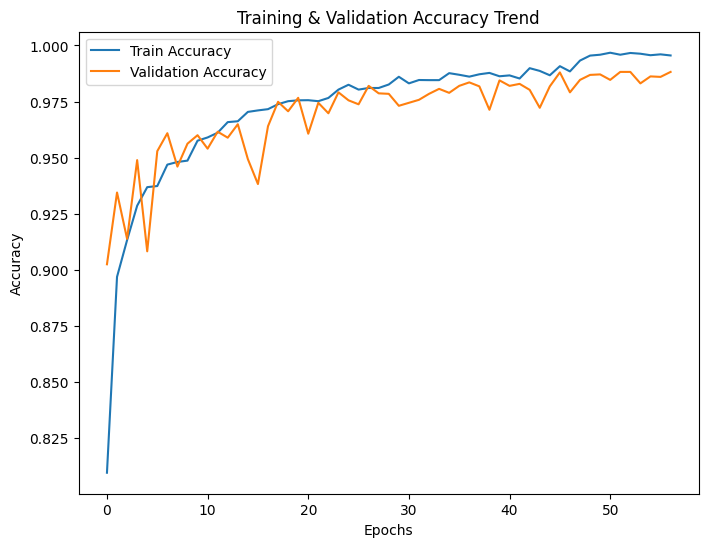


--- Sample Predictions ---
1/1 [==============================] - 0s 17ms/step
Sample 0: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 1: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 19ms/step
Sample 2: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 3: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 4: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 5: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 6: True = 기타소음, Predicted = 기타소음, Confidence = 0.9997
1/1 [==============================] - 0s 17ms/step
Sample 7: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 8: True =

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils import class_weight

#############################################
# Part 0. 데이터 로드 및 전처리
#############################################
train_file = "final_training_data_sampled_1500_category_03.csv"
test_file = "final_test_sampled_90_category_03.csv"

train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩
#############################################
# 최종 6개 라벨 : 
# 교통 소음 5개: '이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'
# 기타소음: '기타소음'
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
# 영어 라벨
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in train_df.columns:
    train_df['encoded_label'] = train_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("학습 데이터에 'ood_label' 컬럼이 없습니다.")

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

print("Train unique labels:", np.unique(train_df['ood_label']))
print("Test unique labels:", np.unique(test_df['ood_label']))

y_train = train_df['encoded_label'].values
y_test  = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_train = train_df[mfcc_columns].values
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 데이터 증강: 오토바이 주행음(1)과 차량 주행음(4)
#############################################
def augment_mfcc(mfcc, noise_level=0.02):
    # 간단하게 노이즈를 추가하는 증강 함수 (여기에 추가 증강 기법을 같이 적용 가능)
    noise = np.random.normal(0, noise_level, mfcc.shape)
    return mfcc + noise

X_train_aug = []
y_train_aug = []

for i in range(len(X_train)):
    sample = X_train[i]
    lbl = y_train[i]
    # 원본 데이터 추가
    X_train_aug.append(sample)
    y_train_aug.append(lbl)
    # 만약 오토바이 주행음(1) 또는 차량 주행음(4) 클래스면 추가 증강 2회 진행
    if lbl in [1, 4]:
        for _ in range(2):
            aug_sample = augment_mfcc(sample, noise_level=0.02)
            X_train_aug.append(aug_sample)
            y_train_aug.append(lbl)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
print("Augmented X_train shape:", X_train_aug.shape)

#############################################
# Part 4. Train/Validation Split & One-hot Encoding
#############################################
y_train_cat = to_categorical(y_train_aug, num_classes=len(final_labels))
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_aug, y_train_cat, test_size=0.20, random_state=42, stratify=y_train_aug
)

#############################################
# Part 5. 모델 정의: 수정된 ResNet 모델 (출력 유닛 6개)
#############################################
def residual_block(x, filters, kernel_size=3, stride=1, use_dropout=False):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if use_dropout:
        x = Dropout(0.2)(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, 64, use_dropout=True)
    x = residual_block(x, 128, stride=2, use_dropout=True)
    x = residual_block(x, 256, stride=2, use_dropout=True)
    x = residual_block(x, 512, stride=2, use_dropout=True)
    x = GlobalAveragePooling1D()(x)
    # 추가 Dense layer로 미세 조정 (차량 주행음 등 구분력 개선)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

num_classes = len(final_labels)   # 6
resnet_model_modified = build_resnet((50, 1), num_classes)
optimizer = Adam(learning_rate=0.001)
resnet_model_modified.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model_modified.summary()

#############################################
# Part 6. 클래스 가중치 재계산 (특히 클래스 1, 4의 가중치를 높임)
#############################################
cw = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_split, axis=1)),
                                         y=np.argmax(y_train_split, axis=1))
cw_dict = dict(enumerate(cw))
# 예를 들어, 오토바이 주행음(1)과 차량 주행음(4)가 부족하다면 가중치를 1.5배로 조정
cw_dict[1] *= 1.5
cw_dict[4] *= 1.5
print("클래스 가중치:", cw_dict)

#############################################
# Part 7. 모델 학습
#############################################
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

history = resnet_model_modified.fit(
    X_train_split, y_train_split,
    epochs=150, batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    class_weight=cw_dict,
    verbose=1
)

# 모델 저장 (새 파일명으로 저장)
resnet_model_modified.save("resnet_model_modified_v5.h5")
print("모델이 resnet_model_modified_v5.h5 파일로 저장되었습니다.")

#############################################
# Part 8. 평가 함수 정의 및 적용 (영어 라벨 표시, 정확도 추세 그래프 단 한 번 출력)
#############################################
def evaluate_and_plot(model, X, y_true, dataset_name="Dataset", hist=None):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()
    
    if hist is not None:
        plt.figure(figsize=(8,6))
        plt.plot(hist.history['accuracy'], label='Train Accuracy')
        plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training & Validation Accuracy Trend")
        plt.legend()
        plt.show()
    
    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 검증 데이터 평가
val_acc = evaluate_and_plot(resnet_model_modified, X_val_split, y_val_split, dataset_name="Validation", hist=history)

# 평가: 테스트 데이터 평가
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))
test_acc = evaluate_and_plot(resnet_model_modified, X_test, y_test_cat, dataset_name="Test", hist=history)

#############################################
# Part 9. 정확도 추세 그래프 (Train vs Validation; 단 한 번 출력)
#############################################
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Trend")
plt.legend()
plt.show()

#############################################
# Part 10. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(resnet_model_modified.predict(X_test[i:i+1]))]
    conf = np.max(resnet_model_modified.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")
